# 0. Introduction

**Dataset**  
* [diabetes(당뇨병)](https://github.com/MyungKyuYi/AI-class/blob/main/diabetes.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**
* ~~당뇨병 데이터를 가지고 Machine Learning 5가지 Classification을 수행~~
  * ~~SVM, LR, RF, DT, KNN~~
* ~~동일한 데이터로 Deep Learning Classification을 수행~~
  * ~~Dense Layer만 사용하여 진행할 것~~
* 동일한 데이터에서 'Outcome'을 삭제하고, 'BMI'를 Label로 하여 Regression을 수행

## 0.1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 1. 기존에 label로 사용하던 'Outcome' 삭제
# 2. dataset을 확인할 때의 편의를 위해서 label로 사용할 'BMI'를 가장 마지막 column으로 이동시키기
tmp_BMI = df['BMI']
df = df.drop(['BMI', 'Outcome'], axis=1)
print("======= df.drop 진행 =======")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")

# 해당 cell에서는 '1.'만 진행, 아래 cell에서 이어서 '2.'를 진행

======= df.drop 진행 =======
Shape: (768, 7)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [4]:
# (이어서)2. 가장 마지막 column에 'BMI'를 추가

# 현재 df의 Shape에서 column이 7개임을 알 수 있음.
# 이때 column index는 0부터 시작하므로 현재 마지막 column의 index는 6임.
# df의 / 7번 index 자리에 / 'BMI'라는 column name으로 / tmp_BMI 데이터를 insert
df.insert(7, 'BMI', tmp_BMI)
df

# 'BMI' column을 기존 6번 째(index 5)에서 마지막으로 변경함

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMI
0,6,148,72,35,0,0.627,50,33.6
1,1,85,66,29,0,0.351,31,26.6
2,8,183,64,0,0,0.672,32,23.3
3,1,89,66,23,94,0.167,21,28.1
4,0,137,40,35,168,2.288,33,43.1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63,32.9
764,2,122,70,27,0,0.340,27,36.8
765,5,121,72,23,112,0.245,30,26.2
766,1,126,60,0,0,0.349,47,30.1


> **cf. [pandas.DataFrame.insert — pandas 2.2.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html)**  
`DataFrame.insert(loc, column, value, allow_duplicates=NoDefault.no_default)`  
Insert column into DataFrame at specified location.

In [5]:
# missing value를 확인하는 방법 두 가지
# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")
# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): print("There are no missing values.")
print("\n\n")

# 또한 이를 응용하여 null이 존재한다면 자동으로 처리하는 if statement를 작성 가능
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   BMI                       768 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
DiabetesPedigreeFunction    0
Age                         0
BMI                         0
dtype: int64



There are no missing values.




> **cf. [pandas.DataFrame.dropna — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**  
`DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False, ignore_index=False)`  
Remove missing values.

> **cf. [누락 데이터(Missing value)를 처리하는 7가지 방법 / Data Imputation - 밥먹는 개발자](https://dining-developer.tistory.com/19)**

In [6]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

# 위에서 다룬 missing value와 관련된 개념인데, 위에서는 missing value가 Nan이나 Null인 경우만 다뤘다.
# 하지만 dataset의 생산자(?)에 따라서 missing value를 0이나 기타 다른 값으로 표시하는 경우도 존재한다.
# 해당 dataset 기준으로 예를 들자면, 'Prgnancies'의 경우에는 0이 가능하지만 'Glucose'나 'BMI' 등은
# 사실상 불가능한 값이다. 따라서 본 dataset에서는 0을 missing value로 표현했을 것임을 추정할 수 있다.
# 다만, 여기서 해당 missing values에 대한 처리는 다루지 않겠다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,0.471876,33.240885,31.992578
std,3.369578,31.972618,19.355807,15.952218,115.244002,0.331329,11.760232,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,0.243750,24.000000,27.300000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,0.372500,29.000000,32.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,0.626250,41.000000,36.600000
max,17.000000,199.000000,122.000000,99.000000,846.000000,2.420000,81.000000,67.100000


> **cf. [pandas.DataFrame.describe — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)**  
`DataFrame.describe(percentiles=None, include=None, exclude=None)`  
Generate descriptive statistics.

In [7]:
# columns 확인
# 해당 dataset은 column의 수가 많지 않지만, 수십 개의 columns가 존재하는 경우라면,
# df나 df.describe()로 한 눈에 확인하기 어려움
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age', 'BMI'],
      dtype='object')

In [8]:
# columns description
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
| BMI(Label)                | BMI 수치
'''

'\n| Pregnancies               | 임신 횟수\n| Glucose                   | 글루코스\n| BloodPressure             | 혈압\n| SkinThickness             | 삼두근 부위 피부 두께\n| Insulin                   | 인슐린 수치\n| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수\n| Age                       | 나이\n| BMI(Label)                | BMI 수치\n'

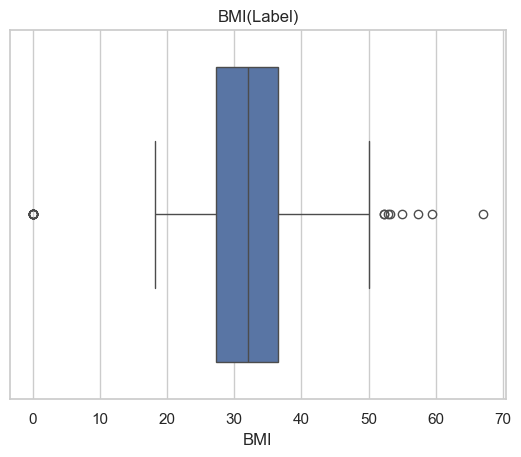

In [9]:
# Label의 분포 확인하기
# Classification의 경우에는 각 class의 count를 확인하면 되지만,
# Regression의 경우 label이 continuous하기 때문에 그 분포를 그래프로 그려 확인
sns.set_theme(style='whitegrid')
sns.boxplot(x='BMI', data=df)
plt.title('BMI(Label)')
plt.show()

# missing value(0)와 outliar(70에 가까운 값)로 추정되는 값을 확인할 수 있다.

> **cf. [seaborn.boxplot — seaborn 0.13.2 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)**  
Draw a box plot to show distributions with respect to categories.  
**cf. [\[데이터시각화\] 파이썬 seaborn : 시각.. : 네이버블로그](https://blog.naver.com/youji4ever/221813848875)**

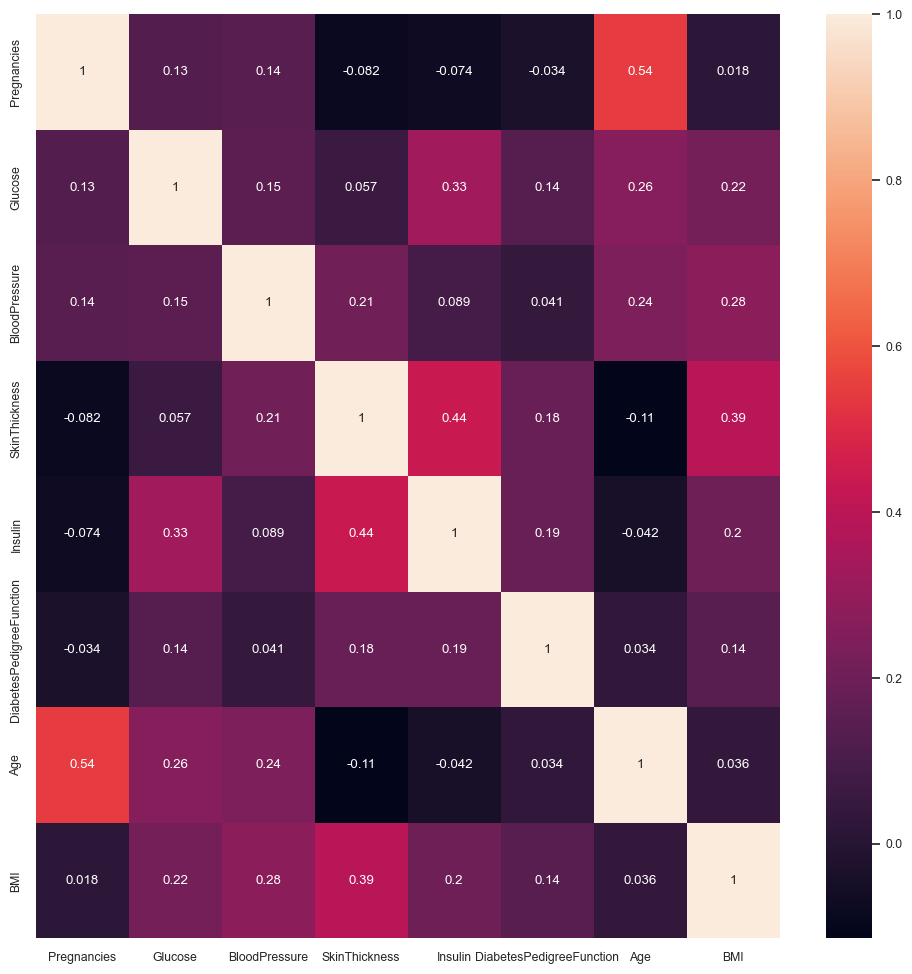

In [10]:
# correlation 확인 - sol1. seaborn heatmap
# numerical하게 확인할 수 있음, missing value 및 outliar는 확인 불가

# if corr >= 0.3, positive-correlated and if corr >= 0.7, high positive-correlated
# if corr <= -0.3, negative-correlated and if corr <= -0.7, high negative-correlated
df_corr = df.corr()

# hitmap ploting by seaborn library
# The 'annot' parameter is used to add annotations to the cells of a heatmap.
# The 'cbar' parameter controls the display of the color bar in plots like heatmaps.
plt.figure(figsize=(12, 12))
sns.set(font_scale=0.8)
sns.heatmap(data=df_corr, annot=True, cbar=True)
plt.show()

# Label인 'BMI'와 reasonable한 correlation을 가지는 feature는 SkinThickness임.

> **cf. [pandas.DataFrame.corr — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)**  
Compute pairwise correlation of columns, excluding NA/null values.

> **cf. [seaborn.heatmap — seaborn 0.13.2 documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)**  
Plot rectangular data as a color-encoded matrix.  
**cf. [15-05 상관계수 (corr / corrwith) - [Python 완전정복 시리즈] 2편 : Pandas DataFrame 완전정복](https://wikidocs.net/157461)**

<Figure size 1000x700 with 0 Axes>

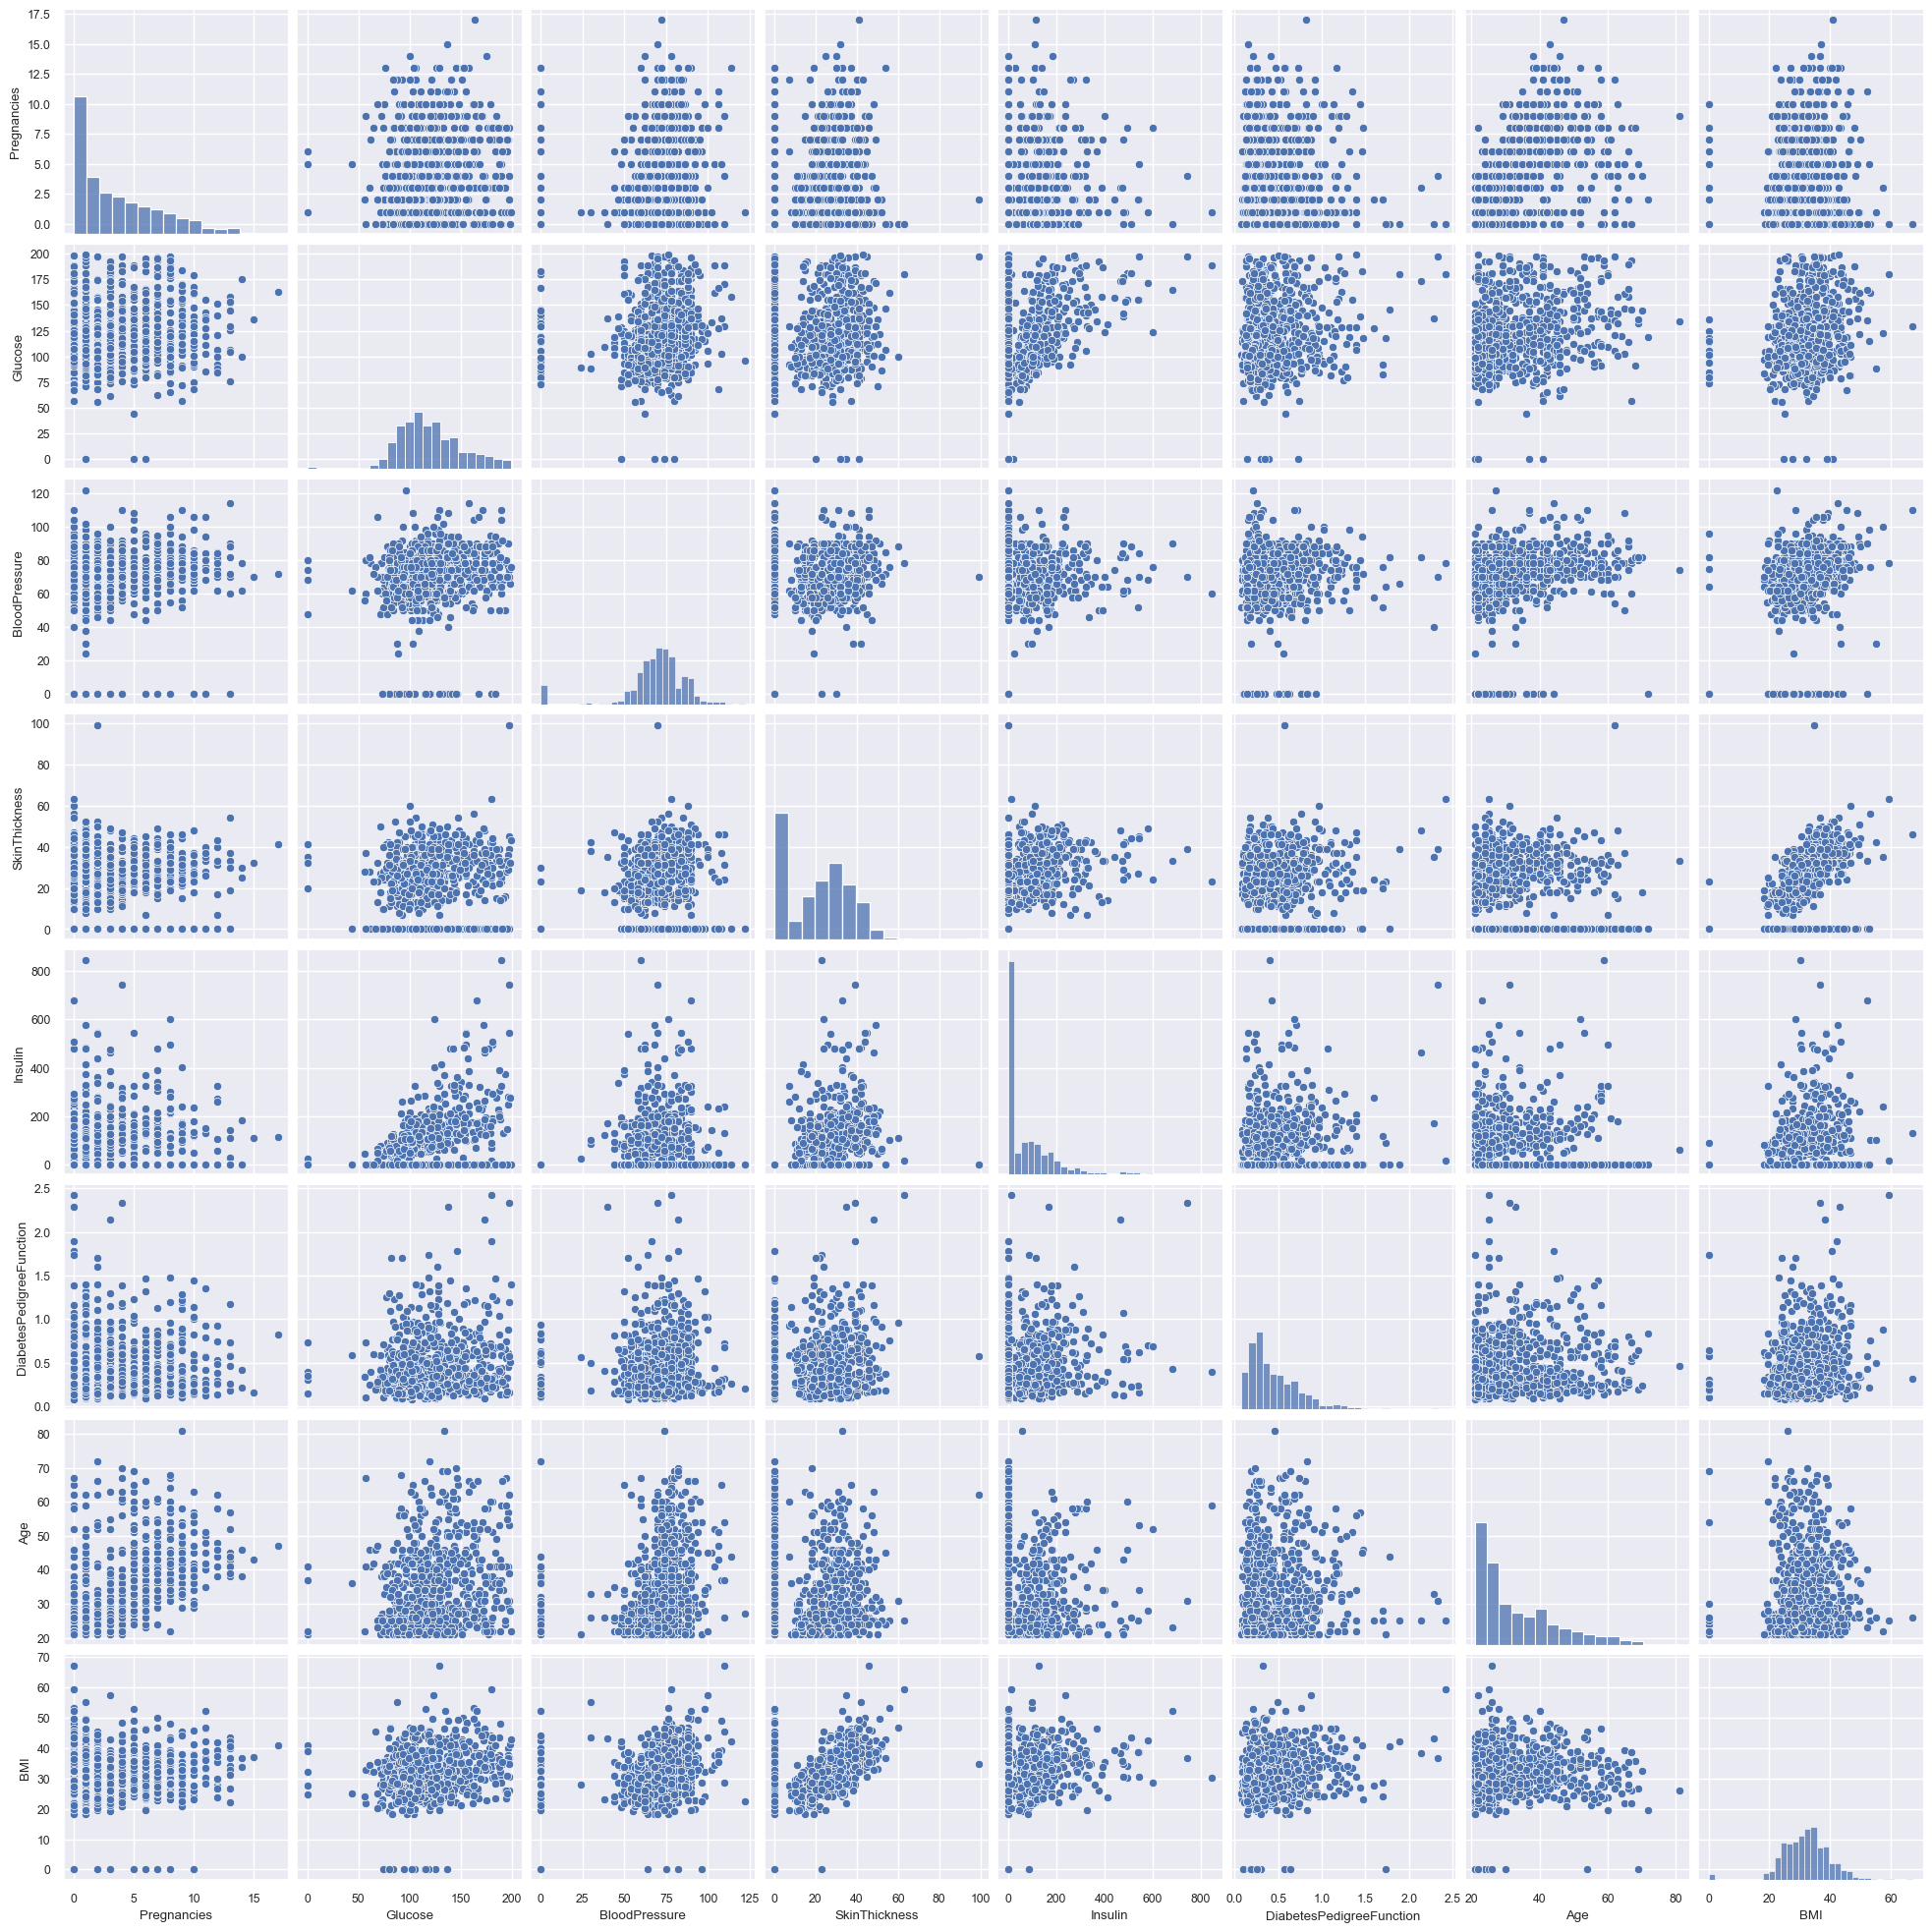

"\n만약 Label이 categorical하다면 다음과 같이 사용 가능함\nplt.figure(figsize=(10, 7))\nsns.pairplot(df,\n             vars=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',\n                   'ConvexArea', 'Extent', 'Perimeter', 'Class'],\n             hue='Class', # 'Class'의 value에 따라 구분하여 plotting\n             palette = {0: 'green', 1: 'blue'}) # hue에서의 색상 구분 지정\nplt.show()\n"

In [11]:
# correlation 확인 - sol2. seaborn pairplot
# numerical하게 확인할 수 있음, missing value 및 outliar도 확인 가능
# 출력까지 시간이 분 단위로 소요될 수 있음
plt.figure(figsize=(10, 7))
sns.pairplot(df,
             vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                   'DiabetesPedigreeFunction', 'Age', 'BMI'])
plt.show()

'''
만약 Label이 categorical하다면 다음과 같이 사용 가능함
plt.figure(figsize=(10, 7))
sns.pairplot(df,
             vars=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
                   'ConvexArea', 'Extent', 'Perimeter', 'Class'],
             hue='Class', # 'Class'의 value에 따라 구분하여 plotting
             palette = {0: 'green', 1: 'blue'}) # hue에서의 색상 구분 지정
plt.show()
'''

> **cf. [seaborn.pairplot — seaborn 0.13.2 documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)**  
Plot pairwise relationships in a dataset.  
By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.  
It is also possible to show a subset of variables or plot different variables on the rows and columns.

/var/folders/m_/5z28qmvj575cs_9xldf0gyd80000gn/T/ipykernel_48382/1380843960.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


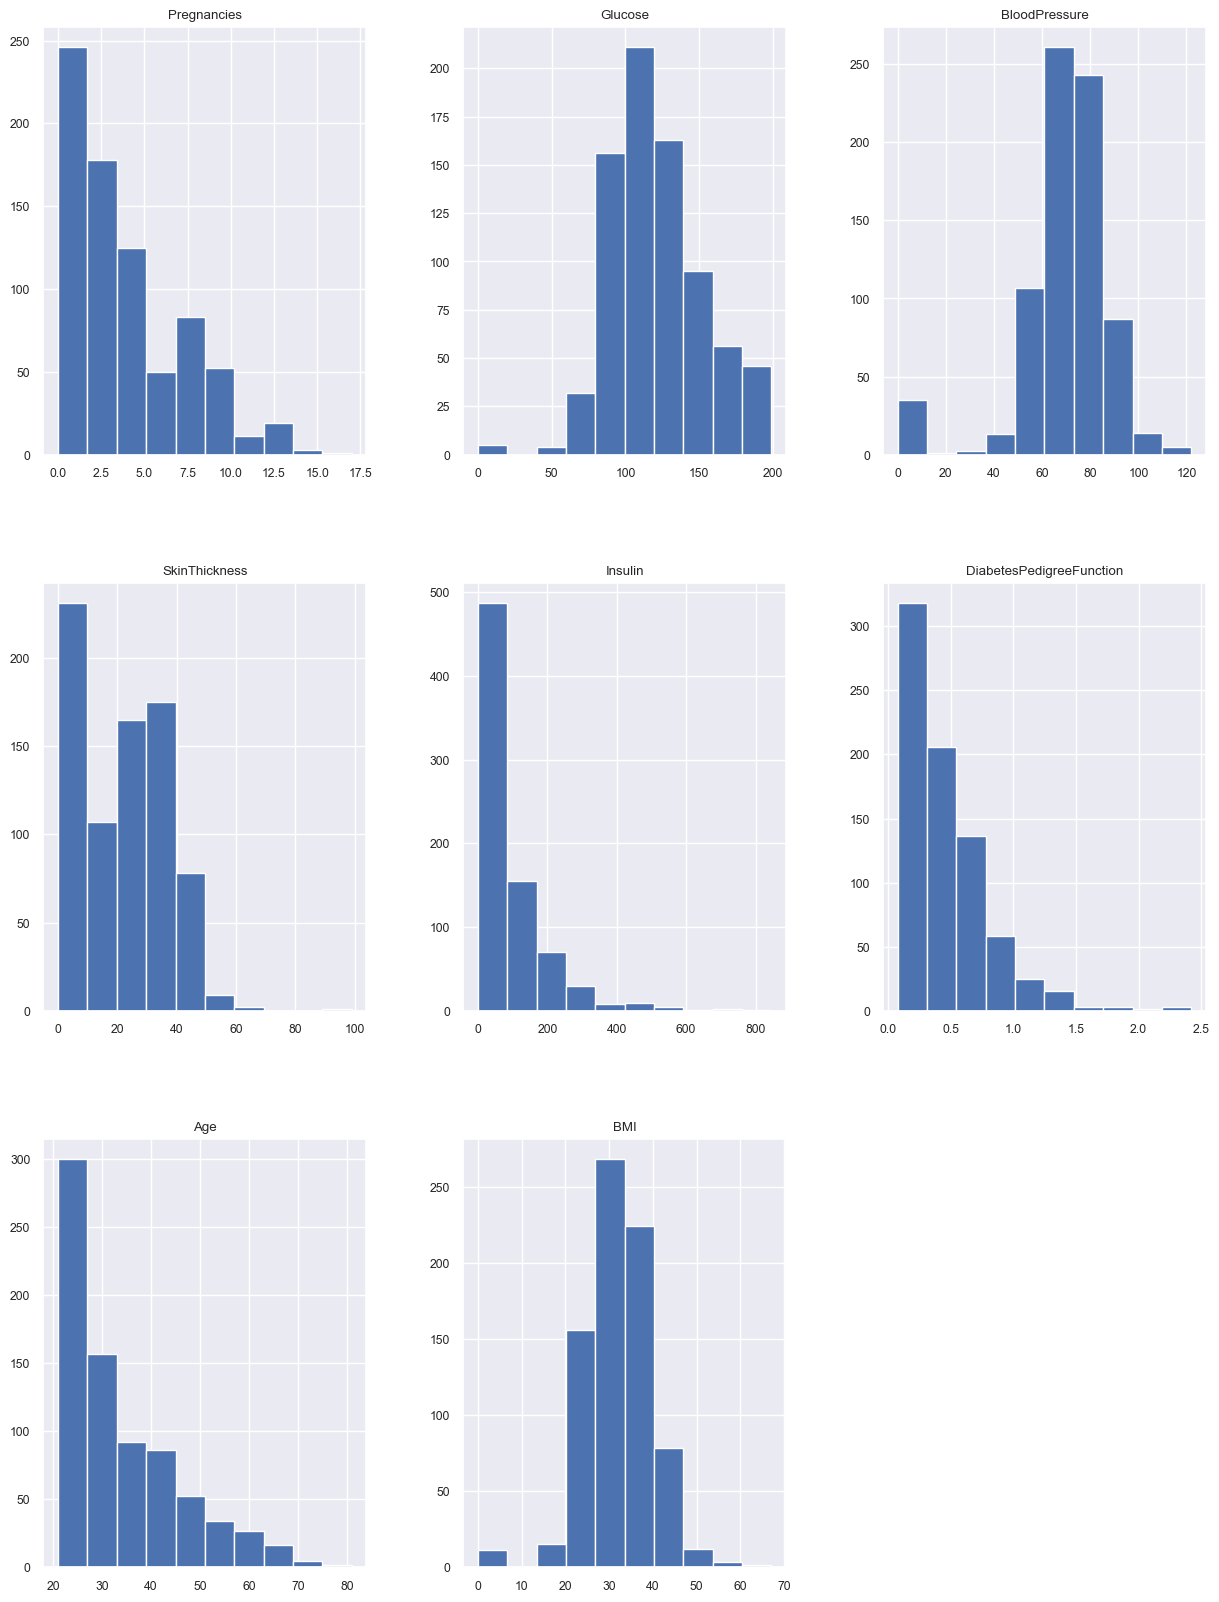

In [12]:
# 각 column별 histogram을 확인하는 방법
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

> **cf. [pandas.DataFrame.hist — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)**  
Make a histogram of the DataFrame’s columns.  
A histogram is a representation of the distribution of data. **This function calls `matplotlib.pyplot.hist()`**, on each series in the DataFrame, resulting in one histogram per column.

# 1. ML

### 1.0.0. Split the dataset

In [13]:
# 1. Split the dataset into features(X) and label(y)
# 2. convert pandas-DataFrame to numpy-ndarray
X = df.drop('BMI', axis=1).to_numpy()
y = df['BMI'].to_numpy()

print(f"X is {type(X)}, y is {type(y)} \n")
print(X[:5])
print("\n")
print(y[:5])

X is <class 'numpy.ndarray'>, y is <class 'numpy.ndarray'> 

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 6.270e-01 5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 3.510e-01 3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 6.720e-01 3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 1.670e-01 2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 2.288e+00 3.300e+01]]


[33.6 26.6 23.3 28.1 43.1]


> **cf. [pandas.DataFrame.drop — pandas 2.2.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)**  
Drop specified labels from rows or columns.  
Remove rows or columns by specifying label names and corresponding axis, or by directly specifying index or column names. When using a multi-index, labels on different levels can be removed by specifying the level. See the user guide for more information about the now unused levels.    
**cf. [09-04. 행/열 삭제 (drop) - [Python 완전정복 시리즈] 2편 : Pandas DataFrame 완전정복](https://wikidocs.net/154050)**

> **cf. [pandas.DataFrame.to_numpy — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)**  
Convert the DataFrame to a NumPy array.  
By default, the dtype of the returned array will be the common NumPy dtype of all types in the DataFrame. For example, if the dtypes are float16 and float32, the results dtype will be float32. This may require copying data and coercing values, which may be expensive.
>    > **`.to_numpy()` 대신에 `.values`를 사용하는 코드들도 존재한다.**  
>    > **cf. [DOC: warning against use of .values should show difference compared to to_numpy()/array · Issue #48425 · pandas-dev/pandas](https://github.com/pandas-dev/pandas/issues/48425)**  
>    > Both methods will produce the same output. However, `.to_numpy()` is preferred for its flexibility and better integration with Pandas.

In [14]:
# Split the dataset into train_set and test_set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

'''
classification인 경우에는 다음과 같이 'stratify' parameter를 사용할 수 있다.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=42)
'''

X_train: Shape (614, 7) 
X_test:  Shape (154, 7)
y_train: Shape (614,) 
y_test:  Shape (154,)


"\nclassification인 경우에는 다음과 같이 'stratify' parameter를 사용할 수 있다.\nX_train, X_test, y_train, y_test = train_test_split(X, y,\n                                                    test_size=0.2,\n                                                    stratify=y,\n                                                    shuffle=True,\n                                                    random_state=42)\n"

### 1.0.1. Standardization

In [15]:
# Standardize the features scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train.head \n{X_train[:5]} \n")
print(f"X_train_scaled.head \n{X_train_scaled[:5]}")

X_train.head 
[[2.000e+00 8.400e+01 0.000e+00 0.000e+00 0.000e+00 3.040e-01 2.100e+01]
 [9.000e+00 1.120e+02 8.200e+01 2.400e+01 0.000e+00 1.282e+00 5.000e+01]
 [1.000e+00 1.390e+02 4.600e+01 1.900e+01 8.300e+01 6.540e-01 2.200e+01]
 [0.000e+00 1.610e+02 5.000e+01 0.000e+00 0.000e+00 2.540e-01 6.500e+01]
 [6.000e+00 1.340e+02 8.000e+01 3.700e+01 3.700e+02 2.380e-01 4.600e+01]] 

X_train_scaled.head 
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832  0.54916055
  -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -0.63929127
   2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077 -0.68682934
   1.13909516]]


> **cf. [StandardScaler — scikit-learn 1.5.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**  
Standardize features by removing the mean and scaling to unit variance.  
The standard score of a sample x is calculated as:  
$ z = \frac{x-u}{s} $  
> * $z$: 표준화된 값
> * $x$: 표준화할 값
> * $u$: mean of the training samples
> * $s$: the standard deviation of the training samples

## 1.1. Linear regression

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
r_squared_train = lr.score(X_train_scaled, y_train)
r_squared_test = lr.score(X_test_scaled, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

# Linear regression은 기본적으로 R-squared 즉, Coefficient of determination을 리턴한다.
# 하지만 이는 직관성이 부족하므로 관례적으로 MSE를 performance 측정에 사용한다(다음 cell).

R-squared-train: 0.2171583649642339
R-squared-test : 0.26510155544609015


In [17]:
# MSE 계산
from sklearn.metrics import mean_squared_error

y_preds = lr.predict(X_test_scaled) # predicted value for data instances

# How to get the MSE - sol1. scikit-learn library 사용
print(f"sol1. MSE: {mean_squared_error(y_preds, y_test)}")

# How to get the MSE - sol2. numpy만 사용하여 직접 계산
def mse_np(predicted, actual):
    return np.mean((np.array(predicted) - np.array(actual)) ** 2)
print(f"sol2. MSE: {mse_np(y_preds, y_test)}")

# How to get the MSE - sol3. python만 사용하여 직접 계산
def mse_py(predicted, actual):
    # numpy를 사용하면 broadcasting 기능 덕분에 아래 2 lines가 내부적으로 수행되는 것 뿐임.
    sum_squared_error = sum((p - a) ** 2 for p, a in zip(predicted, actual))
    mean_squared_error = sum_squared_error / len(actual)
    return mean_squared_error
print(f"sol3. MSE: {mse_py(y_preds, y_test)}")

# X_test_scaled datainstance들을 Linear regression model에 넣었을 때의 예측값 확인
print(f"\ny_preds.head: \n{np.round(y_preds[:10], 2)}")
print(f"\ny_actual.head: \n{y_test[:10]}")
print(f"\nMSE.head: \n{((np.array(y_preds) - np.array(y_test)) ** 2)[:10]}")

sol1. MSE: 52.24058284874793
sol2. MSE: 52.24058284874793
sol3. MSE: 52.240582848747934

y_preds.head: 
[31.81 34.3  27.57 29.22 30.04 32.32 27.82 23.45 34.87 29.11]

y_actual.head: 
[34.  35.7 30.8 24.6 29.9 37.7 20.4 33.8 31.3 33.7]

MSE.head: 
[4.79348108e+00 1.94622718e+00 1.04621328e+01 2.13893736e+01
 1.82879697e-02 2.88987151e+01 5.51053232e+01 1.07192031e+02
 1.27448417e+01 2.10524763e+01]


> **cf. [numpy.round — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.round.html)**  
`numpy.round(x, decimals=0, out=None)`  
Evenly round to the given number of decimals.

## 1.2. Decision Tree regression

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5,
                           random_state=42)
dt.fit(X_train, y_train)
r_squared_train = dt.score(X_train, y_train)
r_squared_test = dt.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.44214988434410163
R-squared-test : 0.09748027125759529


In [19]:
y_preds = dt.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 64.1560164011729


## 1.3. Random Forest regression

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=3,
                           random_state=42)
rf.fit(X_train, y_train)
r_squared_train = rf.score(X_train, y_train)
r_squared_test = rf.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.3996260004391191
R-squared-test : 0.21785085670325444


In [21]:
y_preds = rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 55.59941978823101


## 1.4. Support Vector Machine regression

In [22]:
from sklearn.svm import SVR # Support Vector Regressor

svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)
r_squared_train = svr.score(X_train, y_train)
r_squared_test = svr.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.2062140453677591
R-squared-test : 0.2514540302024887


In [23]:
y_preds = svr.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 53.210723251754914


# 2. DL

## 2.1. Dense Layer

In [24]:
import tensorflow as tf
from tensorflow import keras

2024-09-12 01:22:58.833595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


> regression의 경우에는 label에 대한 one-hot encoding이 필요하지 않다.

In [25]:
# Create the model
model = keras.models.Sequential()

# Add layers
model.add(keras.layers.Dense(units=16,
                             activation='ReLU',
                             name='dense1',
                             input_shape=(7,)))
## regression에서는 output layer에 activate하지 않음
model.add(keras.layers.Dense(units=1,
                             name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 16)                128       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


2024-09-12 01:23:02.688963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
from keras.optimizers import Adam
import absl.logging
absl.logging.set_verbosity('error')  # absl의 경고 수준을 에러로만 제한

# Compile the model
model.compile(Adam(learning_rate=0.04), 
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dnn-model.kears',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    batch_size=None,
                    verbose=2,
                    epochs=50,
                    callbacks=[checkpoint_cb, early_stopping_cb])

# history = model.fit(X_train_scaled, y_train,
#                     validation_split=0.2,
#                     batch_size=None,
#                     verbose=2,
#                     epochs=200)

Epoch 1/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 1s - loss: 788.3794 - mean_squared_error: 788.3794 - val_loss: 469.8477 - val_mean_squared_error: 469.8477 - 1s/epoch - 75ms/step
Epoch 2/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 215.9673 - mean_squared_error: 215.9673 - val_loss: 112.1826 - val_mean_squared_error: 112.1826 - 488ms/epoch - 30ms/step
Epoch 3/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 104.0879 - mean_squared_error: 104.0879 - val_loss: 66.8095 - val_mean_squared_error: 66.8095 - 491ms/epoch - 31ms/step
Epoch 4/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 1s - loss: 72.7561 - mean_squared_error: 72.7561 - val_loss: 55.1654 - val_mean_squared_error: 55.1654 - 514ms/epoch - 32ms/step
Epoch 5/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 58.1648 - mean_squared_error: 58.1648 - val_loss: 47.9489 - val_mean_squared_error: 47.9489 - 491ms/epoch - 31ms/step
Epoch 6/50
16/16 - 0s - loss: 51.8431 - mean_squared_error: 51.8431 - val_loss: 48.5468 - val_mean_squared_error: 48.5468 - 48ms/epoch - 3ms/step
Epoch 7/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 48.0532 - mean_squared_error: 48.0532 - val_loss: 42.3437 - val_mean_squared_error: 42.3437 - 486ms/epoch - 30ms/step
Epoch 8/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 1s - loss: 44.7610 - mean_squared_error: 44.7610 - val_loss: 42.0842 - val_mean_squared_error: 42.0842 - 623ms/epoch - 39ms/step
Epoch 9/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 1s - loss: 43.2429 - mean_squared_error: 43.2429 - val_loss: 40.4140 - val_mean_squared_error: 40.4140 - 527ms/epoch - 33ms/step
Epoch 10/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 42.5759 - mean_squared_error: 42.5759 - val_loss: 38.2817 - val_mean_squared_error: 38.2817 - 471ms/epoch - 29ms/step
Epoch 11/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 41.4981 - mean_squared_error: 41.4981 - val_loss: 37.5508 - val_mean_squared_error: 37.5508 - 473ms/epoch - 30ms/step
Epoch 12/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 40.5513 - mean_squared_error: 40.5513 - val_loss: 36.9062 - val_mean_squared_error: 36.9062 - 472ms/epoch - 30ms/step
Epoch 13/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 39.4126 - mean_squared_error: 39.4126 - val_loss: 36.5862 - val_mean_squared_error: 36.5862 - 475ms/epoch - 30ms/step
Epoch 14/50
16/16 - 0s - loss: 38.7276 - mean_squared_error: 38.7276 - val_loss: 37.0339 - val_mean_squared_error: 37.0339 - 49ms/epoch - 3ms/step
Epoch 15/50
INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


INFO:tensorflow:Assets written to: best-dnn-model.kears/assets


16/16 - 0s - loss: 37.4070 - mean_squared_error: 37.4070 - val_loss: 36.0775 - val_mean_squared_error: 36.0775 - 476ms/epoch - 30ms/step
Epoch 16/50
16/16 - 0s - loss: 37.2609 - mean_squared_error: 37.2609 - val_loss: 38.7530 - val_mean_squared_error: 38.7530 - 49ms/epoch - 3ms/step
Epoch 17/50
16/16 - 0s - loss: 35.6600 - mean_squared_error: 35.6600 - val_loss: 36.2162 - val_mean_squared_error: 36.2162 - 54ms/epoch - 3ms/step


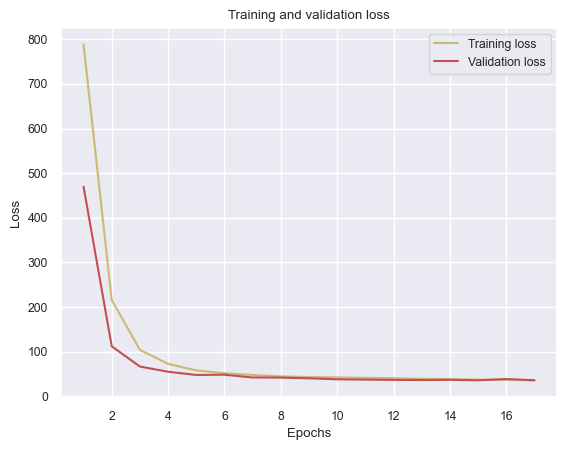

In [27]:
# Epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

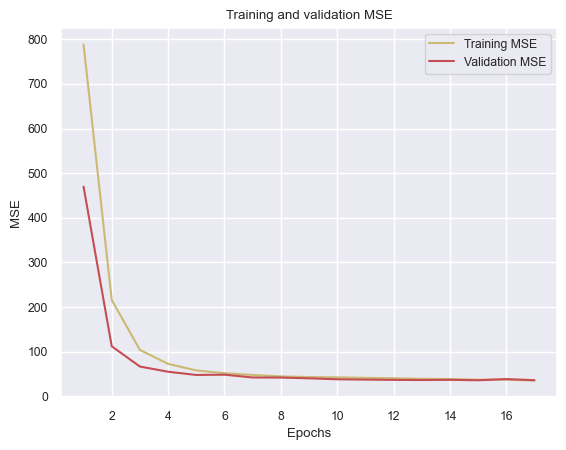

In [28]:
# Epoch에 따른 MSE
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
plt.plot(epochs, acc, 'y', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [29]:
y_preds = model(X_test_scaled)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 57.85859209042152


In [30]:
# output 확인
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[32.50803 ],
       [32.994007],
       [29.37575 ],
       [31.019323],
       [31.169119],
       [30.847906],
       [25.943693],
       [27.805828],
       [32.4564  ],
       [25.739038]], dtype=float32)>